In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
#calculate roc_auc_score
from sklearn.metrics import roc_auc_score
# Import roc_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pickle
import warnings
warnings.filterwarnings("ignore")





In [24]:
data = pd.read_csv(r"D:\OMAR\courses\depi-IBM-Data-Science\fast_made_project\dataset\diabetes.csv")


In [25]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
data[data['Outcome'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


# EDA

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
data.duplicated().sum()

0

In [31]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

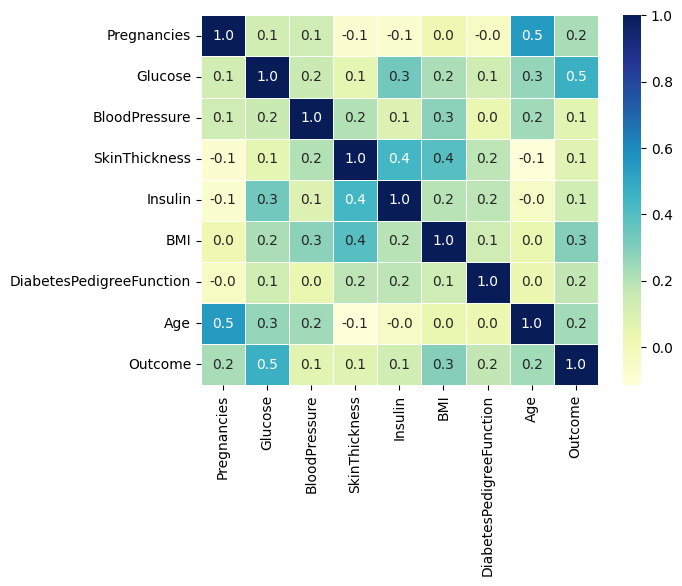

In [32]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt = '0.1f' , linewidths=0.5)

[Text(0, 0, '268')]

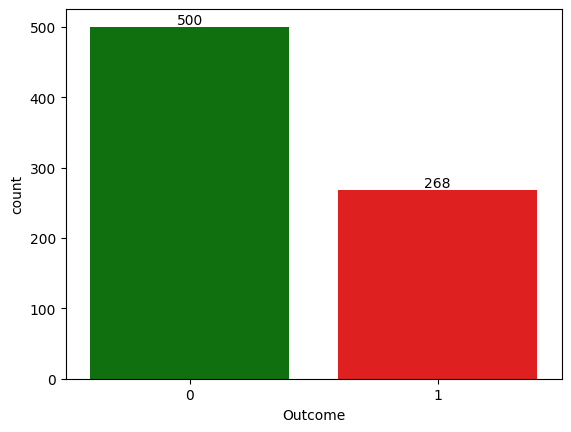

In [33]:
ax = sns.countplot(x='Outcome',data = data, palette=['green','red'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

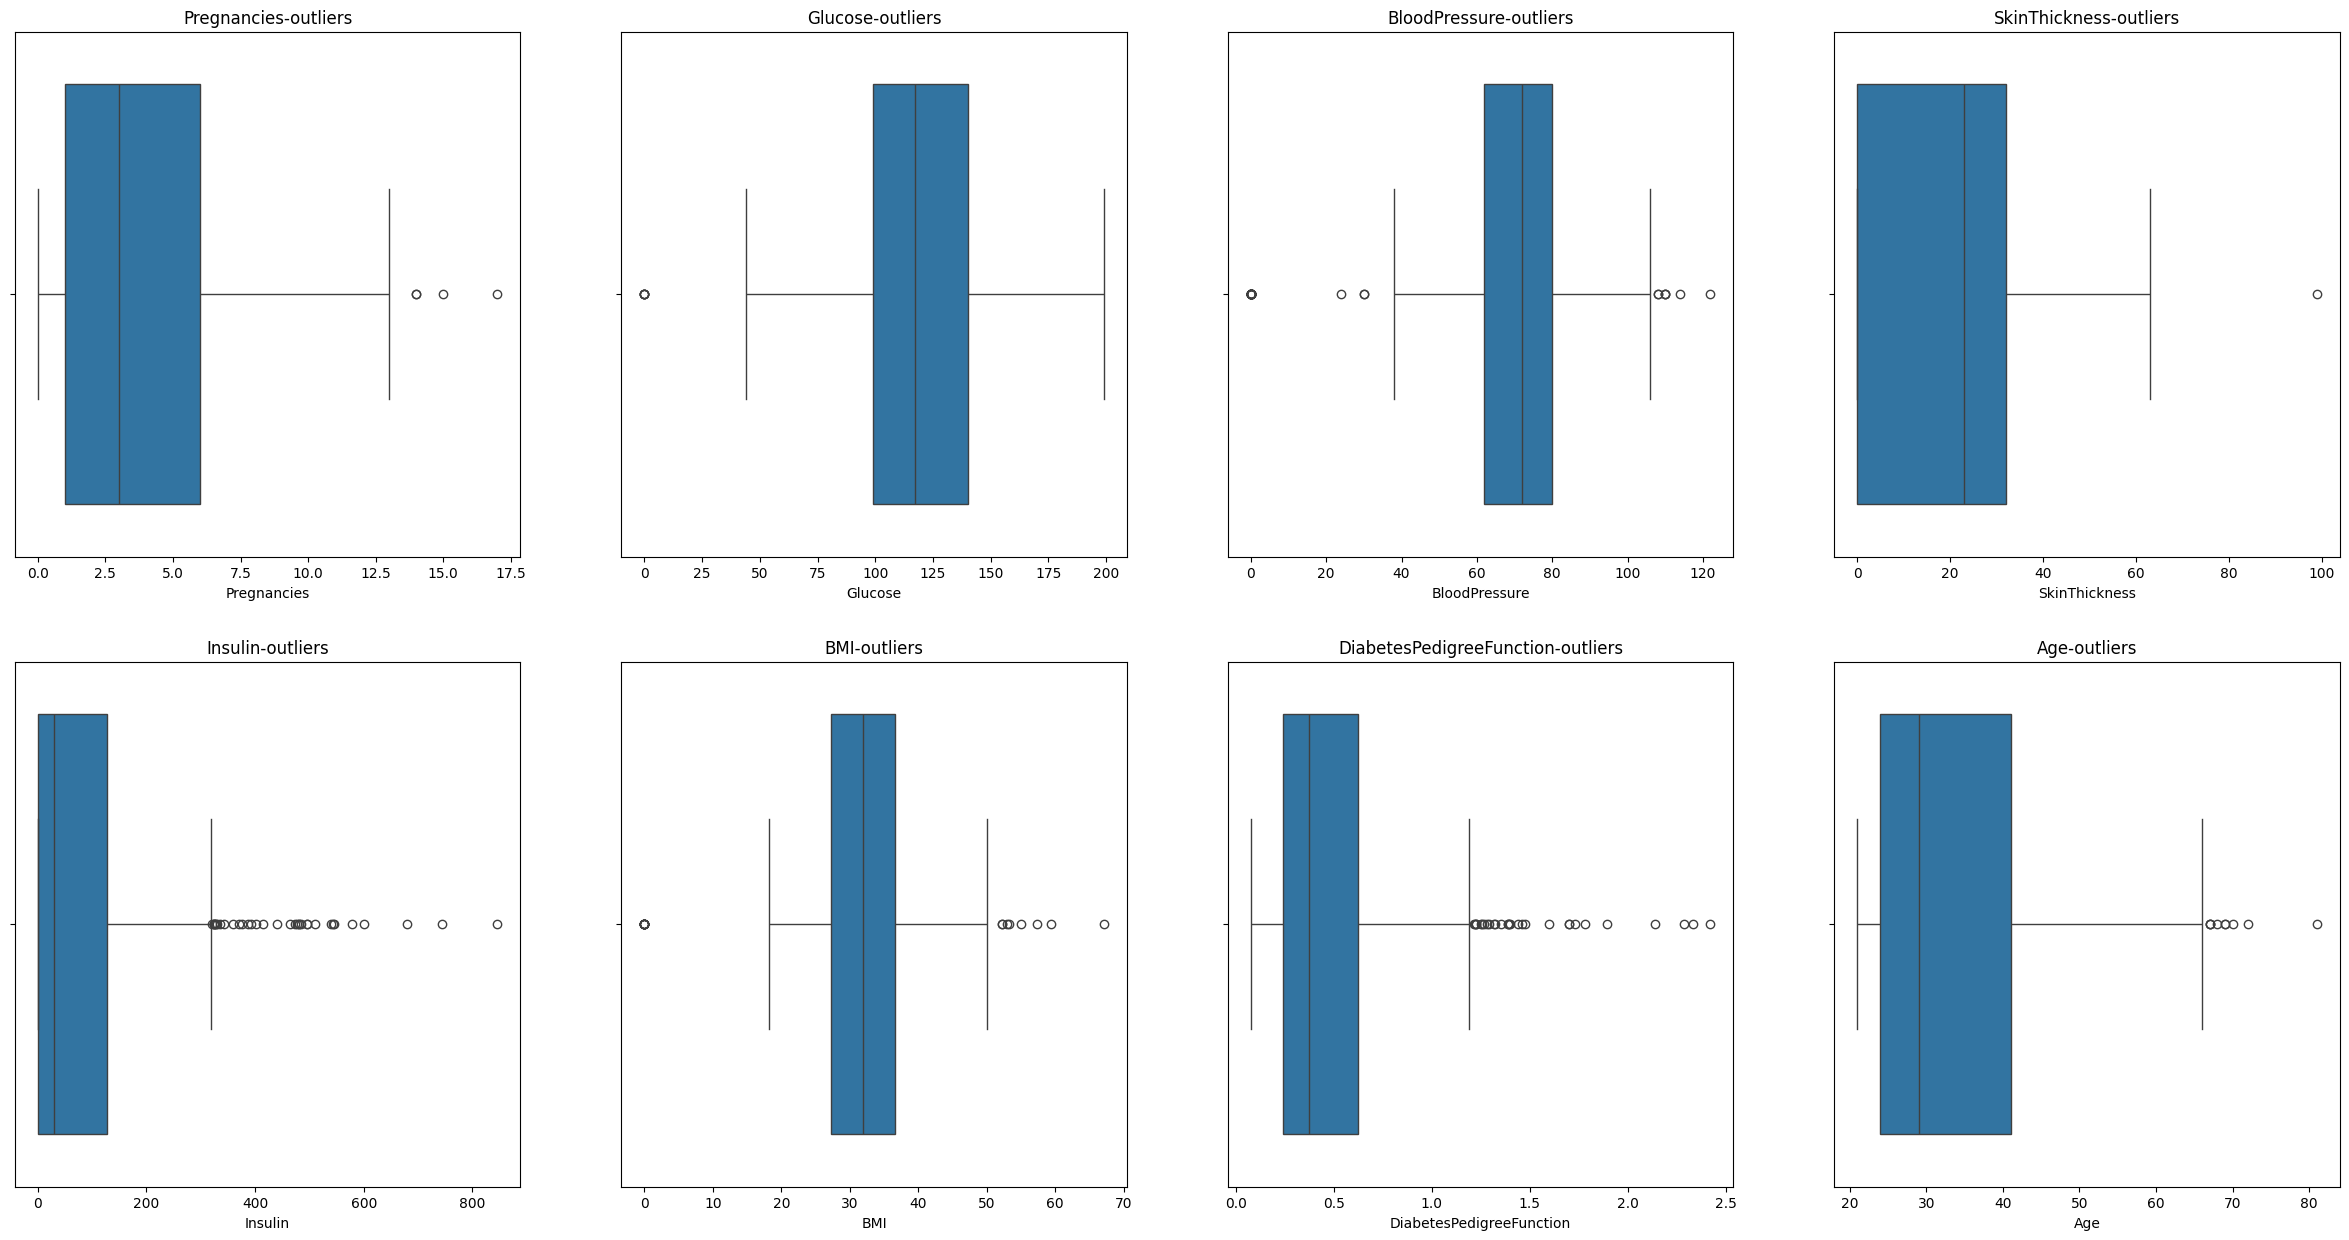

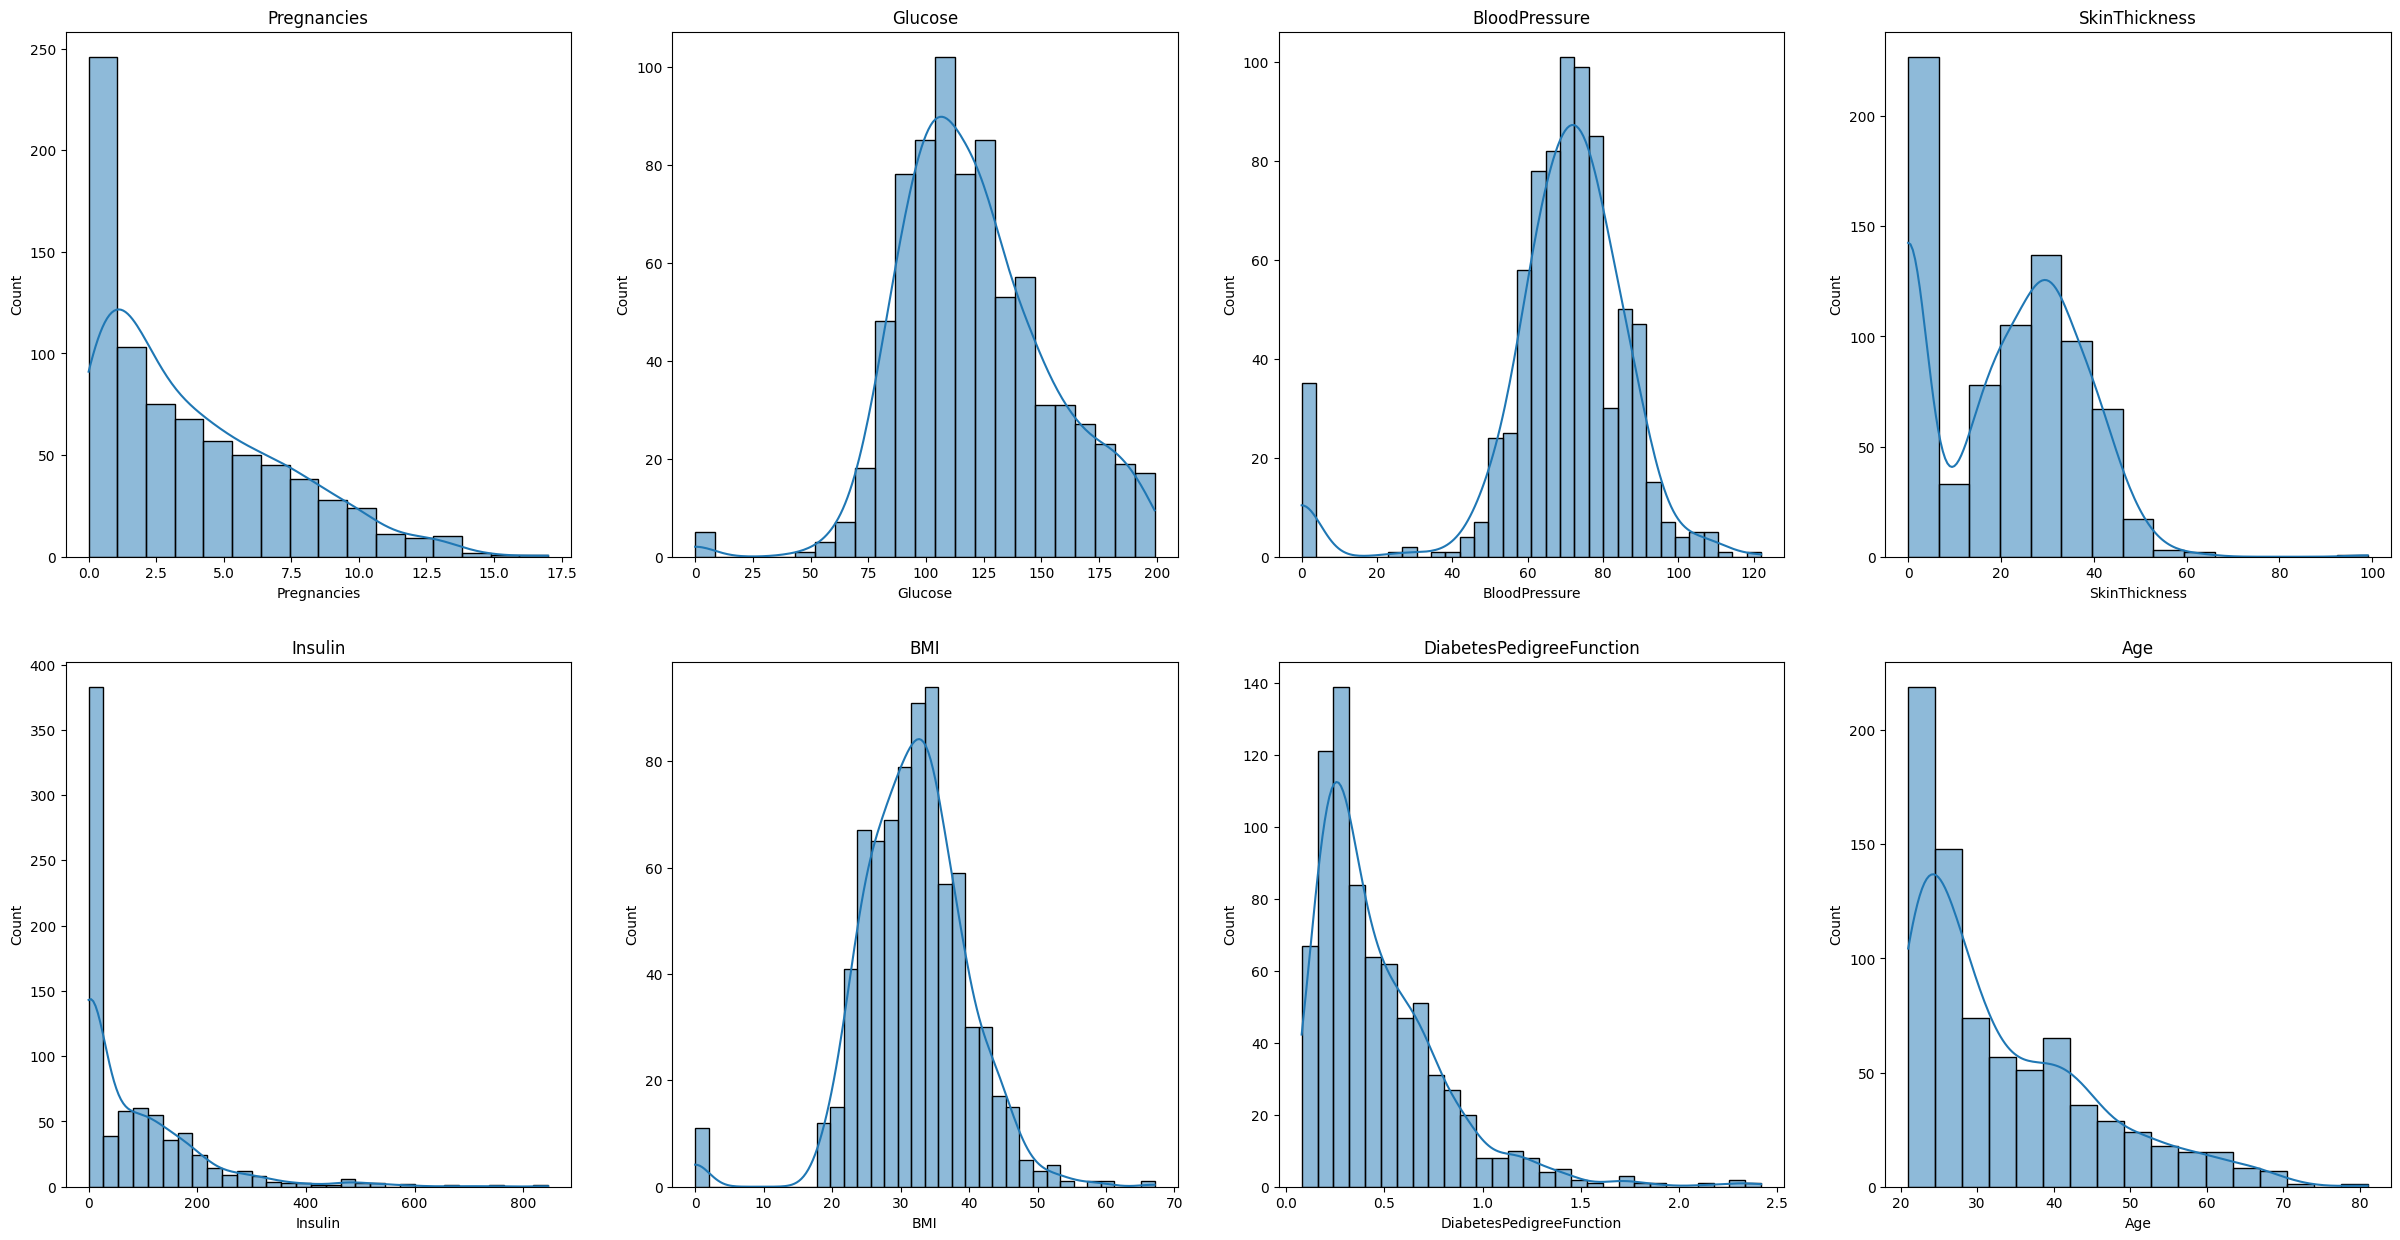

In [34]:
outliers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']

fig_1 = plt.figure(figsize=(30,15))
j = 1
for i in outliers:
    plt.subplot(2, 4, j)
    sns.boxplot(x=data[i], orient='h')  # Set orient='h' for horizontal boxplots
    plt.title(i+'-outliers')  # Add title for each subplot
    plt.xlabel(i)  # Add x-axis label for each plot
    j += 1

fig_2 = plt.figure(figsize=(30,15))
j = 1
for i in outliers:
    plt.subplot(2, 4, j)
    sns.histplot(x=data[i], kde=True)  # Use x=data[i] to ensure horizontal orientation, kde=True for KDE curve
    plt.title(i)  # Add title for each subplot
    plt.xlabel(i)  # Add x-axis label for each plot
    j += 1


# remove outliers

In [35]:
outliers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']

cleaned_data = data.copy()
for i in outliers:
    q1 = data[i].quantile(0.25)                           
    q3 = data[i].quantile(0.75)
    
    iqr  = q3 - q1
    lower_bound = q1 - 1.5* iqr
    upper_bound = q3 + 1.5*iqr
    

    # Cap the values above the upper bound
    cleaned_data[i] = np.where(cleaned_data[i] > upper_bound, upper_bound, cleaned_data[i])

    # Cap the values below the lower bound
    cleaned_data[i] = np.where(cleaned_data[i] < lower_bound, lower_bound, cleaned_data[i])


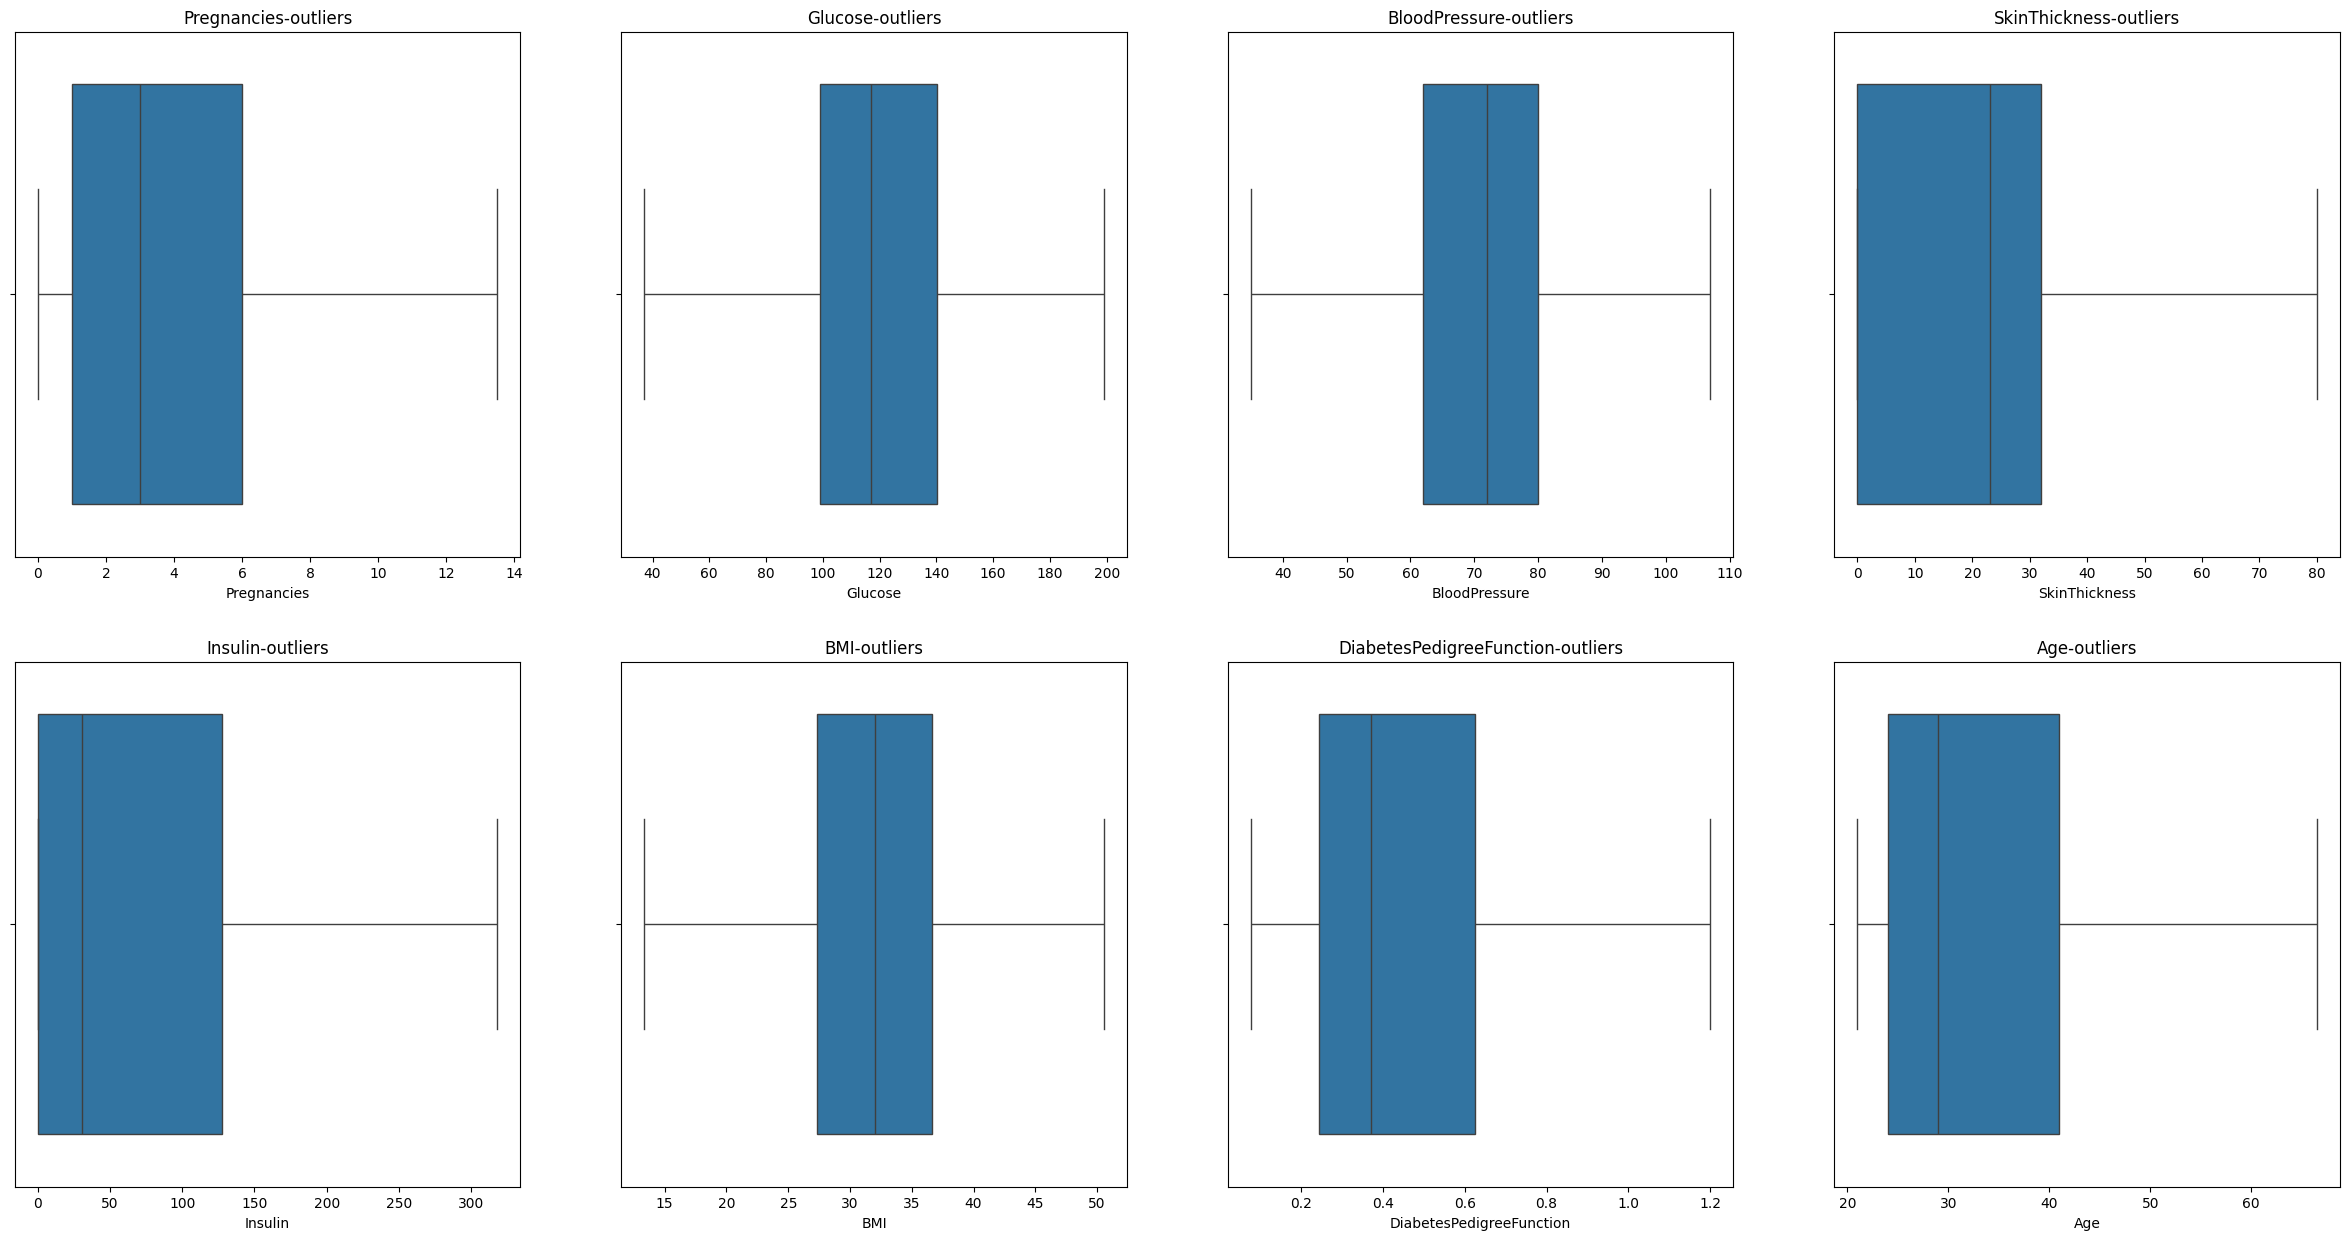

In [36]:
fig_1 = plt.figure(figsize=(30,15))
j = 1
for i in outliers:
    plt.subplot(2, 4, j)
    sns.boxplot(x=cleaned_data[i], orient='h')  # Set orient='h' for horizontal boxplots
    plt.title(i+'-outliers')  # Add title for each subplot
    plt.xlabel(i)  # Add x-axis label for each plot
    j += 1

# creating train_test datasets

In [45]:

X = cleaned_data.drop(["Outcome"],axis=1)
y = cleaned_data["Outcome"]

In [46]:
rm = RandomOverSampler(random_state=12)
x_res , y_res = rm.fit_resample(X,y)

In [47]:
print("old dataset shape: ",Counter(y))
print("new dataset shape: ",Counter(y_res))

old dataset shape:  Counter({0: 500, 1: 268})
new dataset shape:  Counter({1: 500, 0: 500})


In [48]:

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=12 , stratify = (y_res))
col_names = list(X_train.columns)
print(X_train.shape)
print(X_test.shape)

(800, 8)
(200, 8)


# features scaling 

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_dataset1 = pd.DataFrame(X_train, columns=col_names) 


# Save the scaler
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

In [50]:
X_dataset1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.271543,-0.636849,0.054306,0.512544,2.447010,0.548135,-1.072881,-0.528999
1,-1.177652,-0.196443,-2.457345,-1.295151,-0.800111,-0.091670,-1.133585,-0.882291
2,-0.018296,-1.108713,-2.457345,-1.295151,-0.800111,-0.717257,0.448105,-0.264030
3,0.271543,-1.266001,0.190071,0.076204,-0.800111,-0.575078,2.437864,-0.175708
4,1.430898,0.149591,-0.081459,-1.295151,-0.800111,0.164252,0.589749,0.972491
...,...,...,...,...,...,...,...,...
795,-0.887813,2.320165,0.325836,1.385224,-0.800111,1.401209,2.437864,-1.058937
796,2.735174,1.187692,0.054306,1.260555,0.363494,1.116851,1.146207,1.149137
797,0.271543,0.936031,0.868896,1.447558,2.447010,0.804057,0.478457,0.000938
798,-0.018296,0.369794,0.868896,-1.295151,-0.800111,-0.262285,-0.759241,-0.352353


# logistic regression

In [51]:
logreg = LogisticRegression()

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Adjusted parameter grid for Logistic Regression
param_grid = {
    'C': np.logspace(-4, 4, 10), # Regularization strength (inverse of alpha)
    "penalty": ["l1", "l2", "elastic_net"],  
    'solver': ['saga', 'liblinear']  # Suitable solvers for logistic regression
}

# Instantiate logistic regression model
log_reg = LogisticRegression(max_iter=10000)

# Randomized search with 2 iterations
log_reg_cv = RandomizedSearchCV(log_reg, param_grid, cv=kf, n_iter=100)

# Fit the model
log_reg_cv.fit(X_train, y_train)

# Output the best parameters and best score
print(log_reg_cv.best_params_, log_reg_cv.best_score_)

{'solver': 'saga', 'penalty': 'l1', 'C': 0.3593813663804626} 0.75375


In [53]:
#predict the data
y_pred = log_reg_cv.predict(X_test)
# Predict probabilities
y_pred_probs = log_reg_cv.predict_proba(X_test)[:,1]#probability of diabetes
print('probabilities:\n {}'.format(y_pred_probs[:10]))
#1 = has diabetes , 0 = does not have diabetes  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

probabilities:
 [0.43820015 0.34316882 0.50116514 0.96743893 0.96743893 0.20221485
 0.23474335 0.24510743 0.16317767 0.18630849]
[[82 18]
 [25 75]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.81      0.75      0.78       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



roc score is :
 0.8511


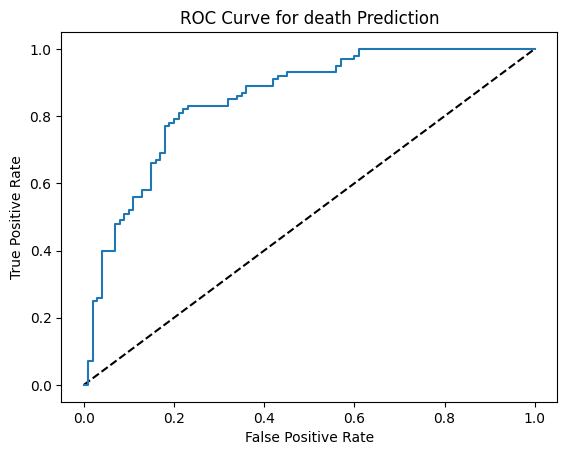

In [54]:

print('roc score is :\n {}'.format(roc_auc_score(y_test, y_pred_probs)))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for death Prediction')
plt.show()

<Axes: >

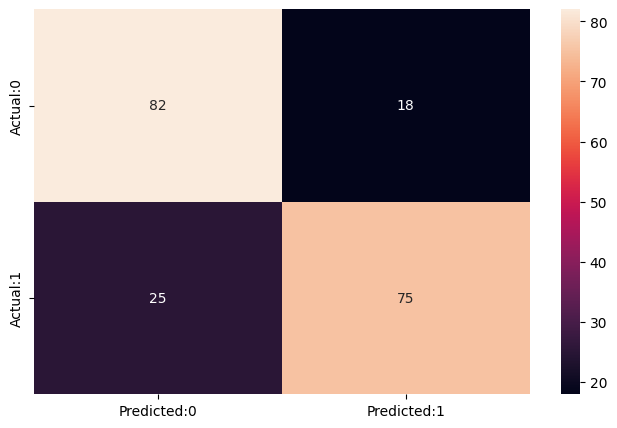

In [55]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [56]:
logregAcc = log_reg_cv.best_score_
print(logregAcc)

0.75375


# kNN

In [57]:
#trying differrent knn for choosing best accuracy
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
 knn = KNeighborsClassifier(n_neighbors=neighbor)
 knn.fit(X_train, y_train)
 train_accuracies[neighbor] = knn.score(X_train, y_train)
 test_accuracies[neighbor] = knn.score(X_test, y_test)

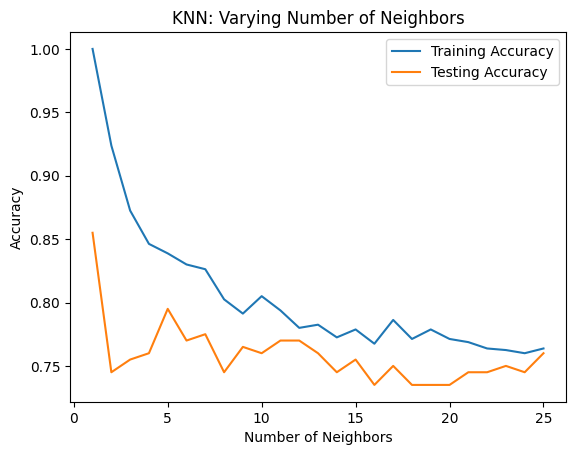

In [58]:
#plot
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [59]:
# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': np.arange(1, 31),  # Number of neighbors to try (1 to 30)
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance: 1 for Manhattan, 2 for Euclidean
}

# Instantiate KNeighborsClassifier model
knn = KNeighborsClassifier()

# Randomized search with 2 iterations (increase n_iter for a broader search)
knn_cv = GridSearchCV(knn, param_grid, cv=kf)

# Fit the model
knn_cv.fit(X_train, y_train)

# Output the best parameters and best score
print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 21, 'p': 2, 'weights': 'distance'} 0.81375


In [60]:
#predict the data
y_pred = knn_cv.predict(X_test)
# Predict probabilities
y_pred_probs = knn_cv.predict_proba(X_test)[:,1]#probability of diabetes

print(y_pred_probs[:10])

#1 = diabetes event , 0 = no diabetes event  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[0.34554258 1.         0.76417046 0.84304471 0.84304471 0.14095956
 0.50211655 0.20960836 0.05016871 0.55934007]
[[75 25]
 [ 6 94]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       100
           1       0.79      0.94      0.86       100

    accuracy                           0.84       200
   macro avg       0.86      0.84      0.84       200
weighted avg       0.86      0.84      0.84       200



In [61]:
#calculate roc_auc_score
print('roc score is :\n {}'.format(roc_auc_score(y_test, y_pred_probs)))

roc score is :
 0.952


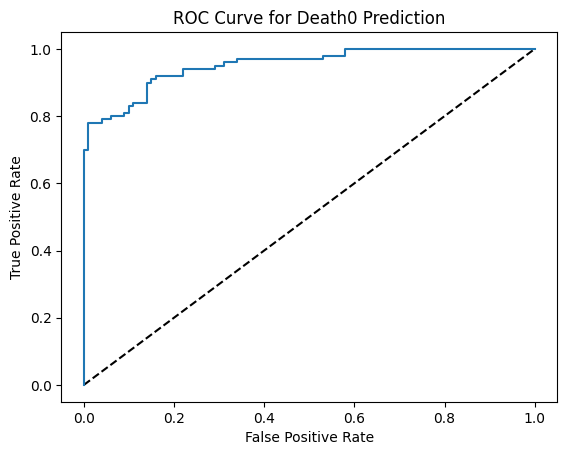

In [62]:
 # Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Death0 Prediction')
plt.show()

<Axes: >

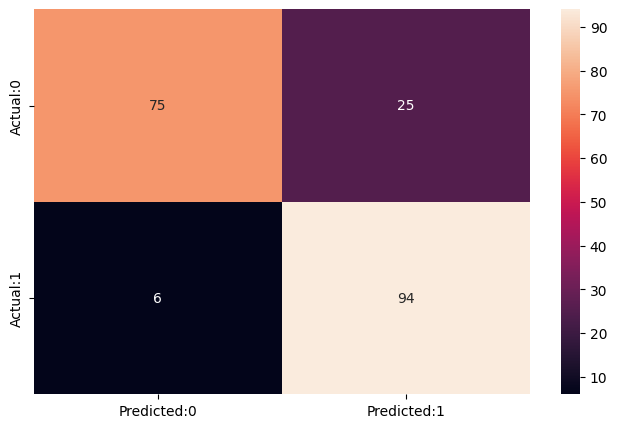

In [63]:

cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [64]:
knnAcc  = knn_cv.best_score_
print(knnAcc)

0.81375


# random forest 

In [65]:
# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': np.arange(100, 500, 100),  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points
}

# Instantiate RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=42)

# Randomized search with 2 iterations (for faster testing, can increase n_iter for better search)
rf_cv = RandomizedSearchCV(rf_clf, param_grid, cv=kf, n_iter=2, random_state=42)

# Fit the model
rf_cv.fit(X_train, y_train)

# Output the best parameters and best score
print(rf_cv.best_params_, rf_cv.best_score_)


{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False} 0.83125


In [66]:
#predict the data
y_pred =rf_cv.predict(X_test)
# Predict probabilities
y_pred_probs = rf_cv.predict_proba(X_test)[:,1]#probability of death 
print('probabilities:\n {}'.format(y_pred_probs[:10]))
#1 = death event , 0 = no death event  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

probabilities:
 [0.44523148 0.64061111 0.62355556 0.80323232 0.80323232 0.05833333
 0.16800794 0.15527778 0.07861111 0.12444444]
[[85 15]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       100
           1       0.86      0.93      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



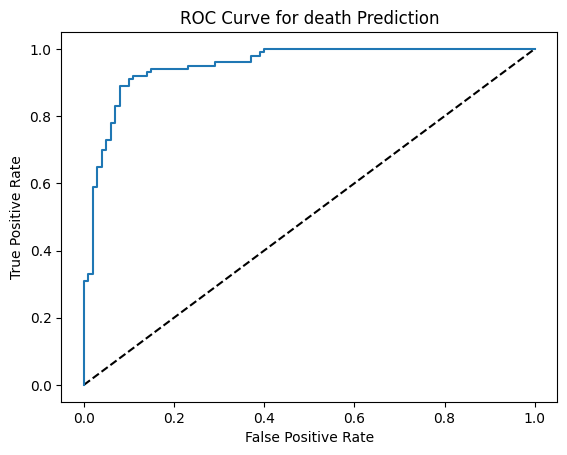

In [67]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for death Prediction')
plt.show()

<Axes: >

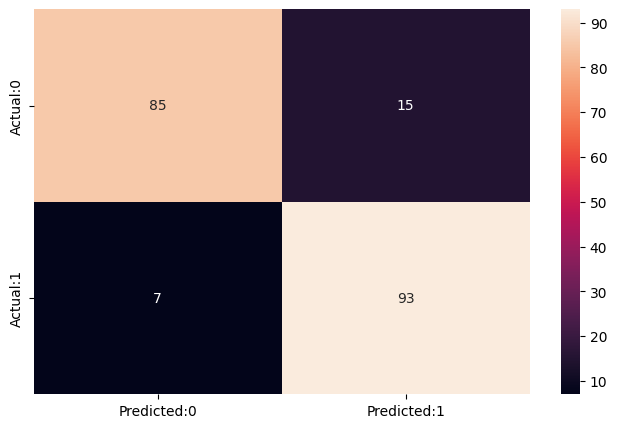

In [68]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [69]:
rfAcc = rf_cv.best_score_
rfAcc

0.83125

# SVM

In [70]:
# Create the parameter space
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
# Instantiate the grid search object
cv = GridSearchCV(SVC(probability=(True)), param_grid=parameters)

In [71]:
# Fit to the training data
cv.fit(X_train,y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.7875 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [72]:
#predict the data
y_pred = cv.predict(X_test)
# Predict probabilities
y_pred_probs = cv.predict_proba(X_test)[:,1]#probability of death 
print('probabilities:\n {}'.format(y_pred_probs[:10]))
#1 = death event , 0 = no death event  
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
#calculate roc_auc_score
print('roc score is :\n {}'.format(roc_auc_score(y_test, y_pred_probs)))

probabilities:
 [0.3454669  0.45308688 0.73114471 0.45998956 0.45998956 0.25602038
 0.43039427 0.10086277 0.15787612 0.11635074]
[[77 23]
 [18 82]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.78      0.82      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

roc score is :
 0.8741


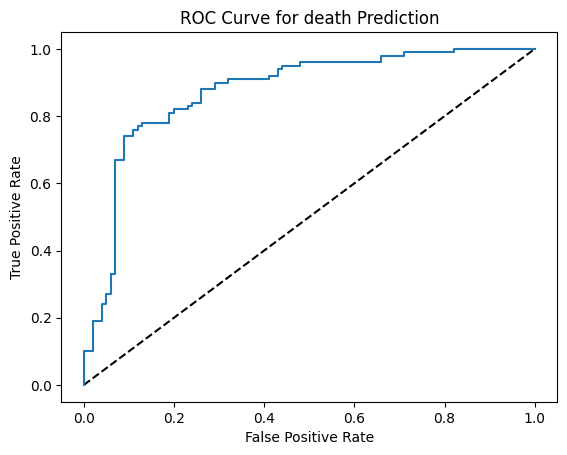

In [73]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for death Prediction')
plt.show()

<Axes: >

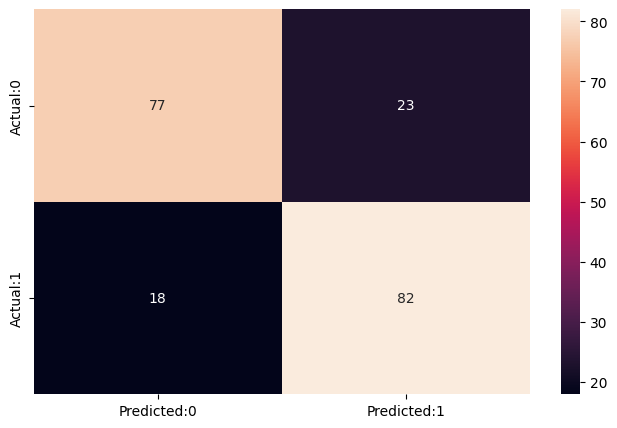

In [74]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, 
            annot=True,fmt='d')

In [75]:
svmAcc = cv.best_score_
print(svmAcc)

0.7875


# Best model

In [76]:
data={'Estimators':[ 'RandomForest','Logistic Regression','K-Nearest Neighbor','Support Vector Machine'],
      'Accuracy':[rfAcc,logregAcc,knnAcc,svmAcc]}
data =pd.DataFrame(data)
data.sort_values('Accuracy', ascending=False)

,Estimators,Accuracy
0,RandomForest,0.83125
2,K-Nearest Neighbor,0.81375
3,Support Vector Machine,0.78750
1,Logistic Regression,0.75375


# use the model to predict new data 

In [77]:
filename = 'Diabetes_prediction.sav'
pickle.dump(rf_cv,open(filename,'wb'))